<a href="https://colab.research.google.com/github/AllamElsheikh/internships-projects/blob/main/Hous_prices_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House prices predctions by Allam elsheikh
the compition link [link text](https://)
The project we go through X steps like the following :
  
    1.Importing libraries and data
    2.Check on the data
    3.Data preparing
    4.Building the model
    5.save the predictions







## Stage_1
importing libraries and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor ,VotingRegressor
from sklearn.metrics import mean_squared_error , r2_score
from google.colab import files

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Stage_2
data checking

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

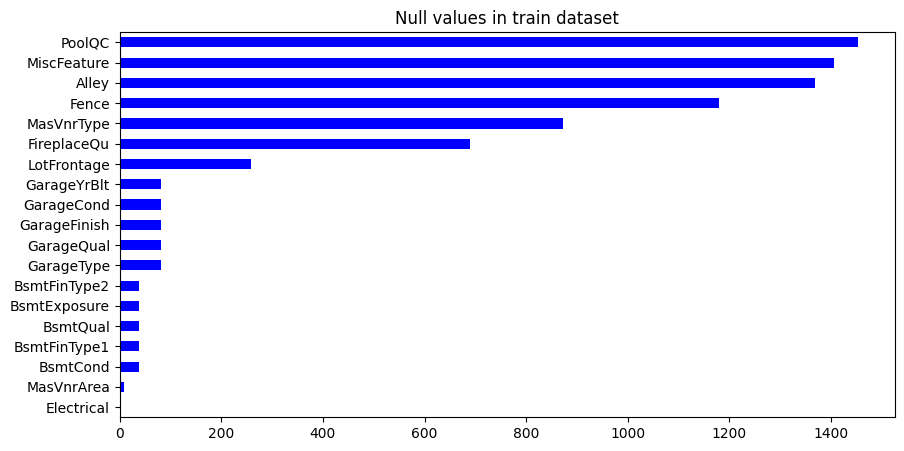

In [ ]:
null_values = train_df.isnull().sum()
null_values = null_values[null_values > 0]
null_values = null_values.sort_values(ascending=True )
null_values.plot(kind='barh' , figsize=(10,5) , color='blue')
plt.title('Null values in train dataset')
plt.show()

In [ ]:
#the target is "salseprice" so we must focuse on it .
train_df['SalePrice'].describe().T

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
train_df['SalePrice'].isnull().sum()

0

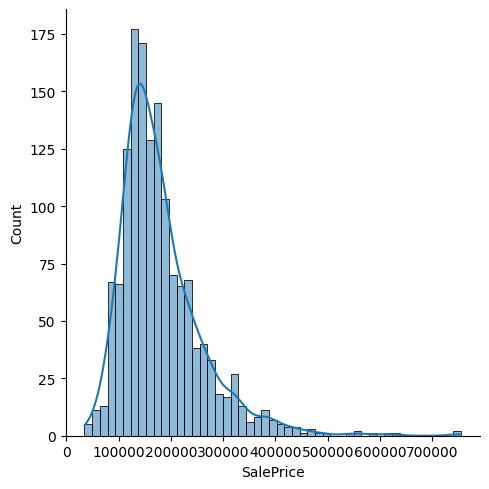

In [ ]:
sns.displot(train_df['SalePrice'] , kde=True)

the target has positive skewness , we must use log

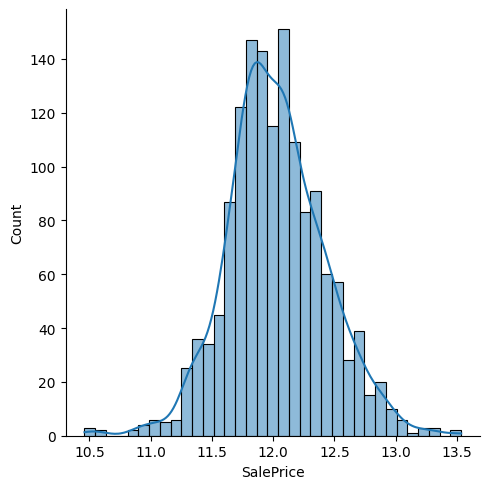

In [ ]:
target = np.log(train_df.pop('SalePrice'))
sns.displot(target , kde=True)

the curve follow the stander diviation

## Stage_3
Data preparing

In [ ]:
df = pd.concat([train_df , test_df] , axis=0)
df.reset_index( inplace=True)
df.head()


,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
df.shape

(2919, 81)

we must do one-hot-encodeing by get-dummis ;to aboid numical influncing on the model


In [ ]:
df = pd.get_dummies(df)
df.shape

(2919, 289)

In [ ]:
null_values = df.isnull().sum()
null_values = null_values[null_values > 0]
null_values = null_values.sort_values(ascending=False )
null_values.head(15)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF1        1
BsmtFinSF2        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageCars        1
GarageArea        1
dtype: int64

In [ ]:
impter = KNNImputer(n_neighbors=5)
df = pd.DataFrame(impter.fit_transform(df) , columns=df.columns)
df.head()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)


SaleCondition_Partial    0
GarageFinish_Unf         0
GarageQual_Ex            0
GarageQual_Fa            0
GarageQual_Gd            0
                        ..
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
Length: 289, dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.drop(['index' , 'Id'] , axis=1 , inplace=True)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_train = df.loc[train_df.index].values
x_test = df.loc[test_df.index].values
x_train.shape , x_test.shape

((1460, 287), (1459, 287))

## Stage_4
Building the model

In [ ]:
LR = LinearRegression()
LR.fit(x_train , target)
# model.score(x_test ,y_test)

LinearRegression()

In [ ]:
LR_predict=LR.predict(x_test)
LR.score(x_train , target)

0.943984113586991

In [ ]:
y_LR = np.expm1(LR_predict)
y_LR

array([206265.48110881, 201385.2555602 , 214114.87291386, ...,
       211180.12762332, 276297.99506484, 143250.00450619])

In [ ]:
RFR = RandomForestRegressor(n_estimators=100 , max_depth=20)
RFR.fit(x_train , target)
RFR_predict= RFR.predict(x_test)
RFR.score(x_train , target)
y_RFR = np.expm1(RFR_predict)
y_RFR

array([206727.32310613, 177383.99419149, 219467.73933507, ...,
       205245.89190322, 262964.39652949, 140170.45023536])

In [ ]:
ensemble = VotingRegressor([('LinearRegression' , LR) , ('RandomForestRegressor' , RFR)])
ensemble.fit(x_train , target)
ensemble_predict = ensemble.predict(x_test)
ensemble.score(x_train , target)

0.9716972265394215

## Stage_5
saveing the predictions

In [ ]:
prediction = np.expm1(ensemble_predict)
prediction = pd.DataFrame({
    'Id' : test_df['Id'] ,
    'SalePrice' : prediction
})
prediction.head()

,Id,SalePrice
0,1461,207623.512611
1,1462,189148.372737
2,1463,216919.477388
3,1464,163448.288415
4,1465,278196.000252


In [ ]:
prediction.to_csv('predictions.csv', index=False)
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

\\: